In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import find_peaks
import pandas as pd


In [51]:
sampling_rate = 1
time_length= 24 * 3645.3333333333333333

In [52]:
time_length_2= 24 * 20

In [53]:
n_samples_2 = sampling_rate * time_length_2
n_samples_2

480

In [54]:
n_samples = sampling_rate * time_length
n_samples = int(n_samples)
n_samples

87488

In [55]:
frequency = 1/24

In [56]:
df = pd.read_csv('data.csv')
df

,Fecha,Hora (UTC),Temperatura (C)
0,01-06-2014,00:00,9.2
1,01-06-2014,01:00,8.6
2,01-06-2014,02:00,7.2
3,01-06-2014,03:00,7.1
4,01-06-2014,04:00,6.1
...,...,...,...
87492,31-05-2024,19:00,16.3
87493,31-05-2024,20:00,15.3
87494,31-05-2024,21:00,14.4
87495,31-05-2024,22:00,12.8


In [57]:
# nulos
df.isnull().sum()

Fecha              0
Hora (UTC)         0
Temperatura (C)    9
dtype: int64

In [58]:
# mostrar los las columnas de la tabla con valores nulos 
df[df.isnull().any(axis=1)]


,Fecha,Hora (UTC),Temperatura (C)
7224,29-03-2015,14:00,NaN
12375,30-10-2015,16:00,NaN
13556,19-12-2015,00:00,NaN
13557,19-12-2015,01:00,NaN
13559,20-12-2015,12:00,NaN
14043,09-01-2016,20:00,NaN
65196,13-11-2021,17:00,NaN
72627,19-09-2022,10:00,NaN
81464,23-09-2023,06:00,NaN


2) Eliminaremos los datos faltantes

In [59]:
# eliminamos los nan
df = df.dropna()
df

,Fecha,Hora (UTC),Temperatura (C)
0,01-06-2014,00:00,9.2
1,01-06-2014,01:00,8.6
2,01-06-2014,02:00,7.2
3,01-06-2014,03:00,7.1
4,01-06-2014,04:00,6.1
...,...,...,...
87492,31-05-2024,19:00,16.3
87493,31-05-2024,20:00,15.3
87494,31-05-2024,21:00,14.4
87495,31-05-2024,22:00,12.8


In [60]:
# estos son los valores que vamos a usar para el tiempo, los cuales son 480 ya que son 480 horas (20 dias) para nuestro df
time_samples = np.linspace(0, time_length, n_samples, endpoint=False)
len(time_samples) # desde 1 jun 2014 - 31 may 2024

87488

In [61]:
time_samples_2 = np.linspace(0, time_length_2, n_samples_2, endpoint=False)
len(time_samples_2)

480

In [62]:
# temperature samples para 2014 - 2024
temperature_samples = df['Temperatura (C)'].values
len(temperature_samples)

87488

In [63]:
# Ahora lo que haremos sera asociar los valores de la columna temperatura a el array time_samples, los primeros 480 valores de la columna Temperatura (C) seran asociados a los valores de time_samples
temperature_samples_2 = df['Temperatura (C)'].values[:n_samples_2]
len(temperature_samples_2)



480

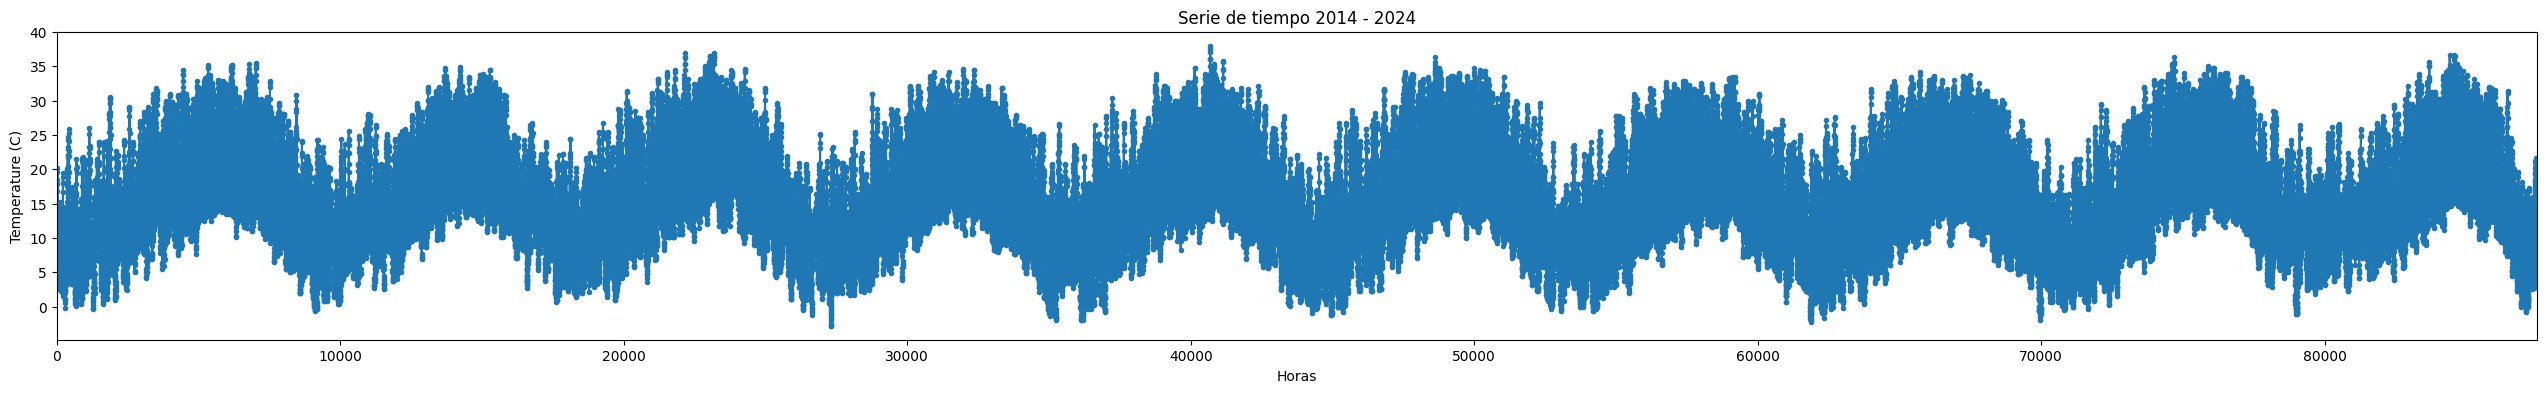

In [64]:
# con esto podemos ver la grafica de la temperatura en funcion del tiempo
fig = plt.figure(figsize=(32, 4))
plt.plot(time_samples, temperature_samples, marker='.')
plt.xlim([0, time_length])

plt.xlabel('Horas')
plt.ylabel('Temperature (C)')

plt.title('Serie de tiempo 2014 - 2024')
plt.show()



In [78]:
# necesitamos ahora que los ultimos 480 valores de la columna Temperatura (C) sean asociados a los valores de time_samples
temperature_samples_2 = df['Temperatura (C)'].values[-n_samples_2:]
temperature_samples_2



array([ 9.1,  6.4,  8.1,  5.8,  5.8,  4.1,  3.4,  4.1,  5.5,  6. ,  4.9,
        5.4,  3.2,  4.3,  8.9, 10.8, 11.8, 12.7, 13.1, 14.1, 14.4, 13.3,
       12. ,  9.2,  7.7,  6.4,  5.2,  4.4,  3.7,  2.7,  2.1,  1.4,  1.3,
        1.1,  0.7,  0.7,  0.6,  3.6,  8. ,  9.6, 11.7, 13.5, 14.5, 15.7,
       16. , 14.7, 12.5, 11.3,  9.1,  5.1,  3.9,  3.2,  2.3,  1.8,  2.1,
        1.8,  0.8,  0.8,  0.3,  0.2,  0.3,  1.9,  7.7, 11.5, 13.1, 15.1,
       16. , 16.9, 16.7, 15.6, 13. ,  7.4,  6.1,  4.9,  4.8,  4.2,  4.1,
        4.3,  4. ,  3.8,  4.4,  3.8,  4.1,  4.2,  4. ,  6.6,  8. ,  8. ,
        8.1,  8.9, 10.1, 10.8, 10. , 10.1,  9.4,  5.5,  4.4,  3.4,  2.6,
        2. ,  1.4,  1.3,  0.8,  0.4,  0.4, -0.2, -0.7, -0.5, -0.8,  1.3,
        6.9,  9. , 11.1, 12.5, 13.4, 14.9, 14.5, 13.9, 12.1,  8.5,  8.1,
        5.3,  4.4,  3.5,  2.7,  2.3,  1.6,  0.9,  0.9,  1. ,  1.4,  0.9,
        1.5,  2.3,  7.6, 10.1, 12.3, 13.2, 14.5, 15.1, 14.7, 13.4, 12. ,
        8.9,  6.3,  5.8,  5.2,  6.6,  3.1,  2.5,  2

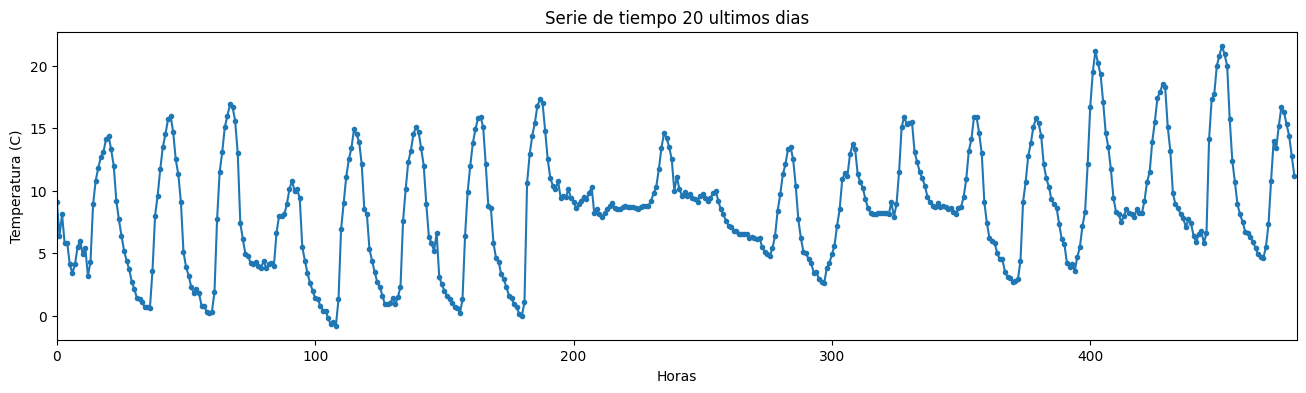

In [82]:
# graficamos 
fig_2 = plt.figure(figsize=(16, 4))
plt.plot(time_samples_2, temperature_samples_2, marker='.')
plt.xlim([0, time_length_2])

plt.xlabel('Horas')
plt.ylabel('Temperatura (C)')
plt.title('Serie de tiempo 20 ultimos dias')

plt.show()



In [79]:
time_samples_3 = np.linspace(0, time_length_2, n_samples_2, endpoint=False)
len(time_samples_2)

480

In [80]:
# Ahora para los primeros 20 dias
temperature_samples_3 = df['Temperatura (C)'].values[:n_samples_2]
temperature_samples_3

array([ 9.2,  8.6,  7.2,  7.1,  6.1,  5.8,  5.3,  4.6,  3.9,  3.8,  3.1,
        2.9,  2.5,  3.9,  7.9, 12.4, 14.4, 16.9, 18.5, 20.2, 19.6, 17.8,
       13.1, 11. , 10.7,  7.8,  7.9,  6.2,  5.8,  5. ,  5. ,  4.4,  4.4,
        3.9,  3.5,  3.5,  3.7,  5.6,  8.5,  9.6, 11.9, 12.8, 14.1, 14.7,
       14.8, 13.7, 11.9, 11.2,  9.8, 10. ,  8. ,  7.3,  6.7,  5.9,  5.9,
        5.2,  4.8,  4.4,  4. ,  4. ,  5.6,  7.6,  8.4,  9.8, 12.8, 14.1,
       13.8, 13.1, 11.7, 11.4,  9.7,  9.1,  8.6,  8.3,  7.5,  6.8,  5.9,
        5.7,  5.1,  4.9,  5. ,  5.2,  5.2,  3.8,  3.5,  4.5,  7.6,  9.9,
       11.7, 13.1, 13.7, 14.4, 15.2, 13.1, 10.6,  9.7,  8.1,  6.3,  8. ,
        8.6,  7. ,  6.6,  6.2,  5.2,  5.2,  4.3,  3.3,  3. ,  2.9,  3.9,
        7.3, 10.4, 11.4, 12.6, 13.7, 14. , 14.1, 13.1, 11.7, 11.1, 10.3,
        8.9,  6.1,  5.8,  7.5,  6.1,  5.4,  5.7,  5.5,  4.5,  3.5,  2.3,
        3.1,  4.8,  7. ,  8.5,  9.3, 10.3, 12.9, 12.4, 12.2, 11.7, 11.2,
       10.7,  9.9,  7.3,  5.5,  5.3,  5.4,  5.1,  5

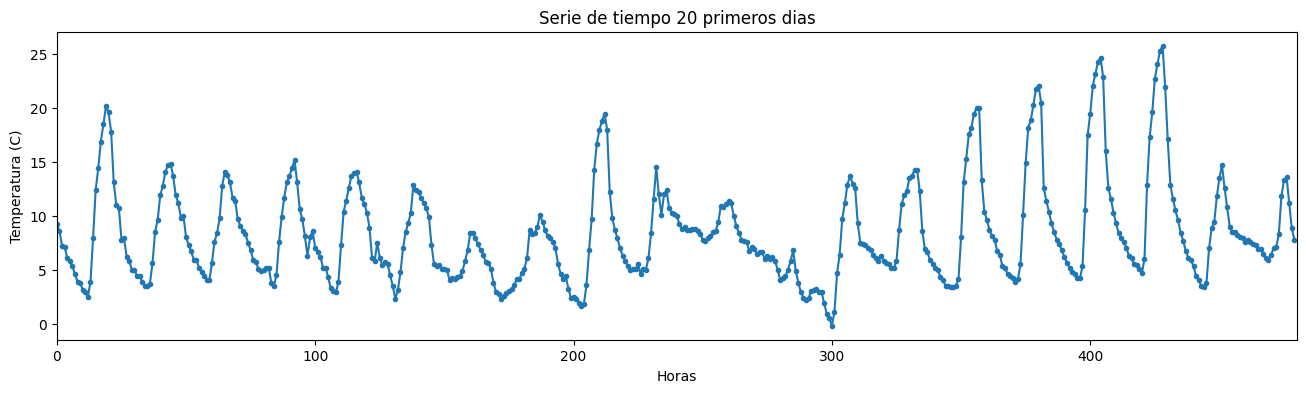

In [85]:
fig_2 = plt.figure(figsize=(16, 4))
plt.plot(time_samples_2, temperature_samples_3, marker='.')
plt.xlim([0, time_length_2])

plt.xlabel('Horas')
plt.ylabel('Temperatura (C)')
plt.title('Serie de tiempo 20 primeros dias')

plt.show()


Aplicaremos el algoritmo RFFT

In [89]:
# Calculamos la transformada de fourier de la temperatura 
temperatura_fft = rfft(temperature_samples)
freqs_fft = rfftfreq(n_samples, 1 / sampling_rate)

In [90]:
temperature_fft_scaled = np.abs(temperatura_fft) / (n_samples/2)
freqs_fft_day = freqs_fft * 24 

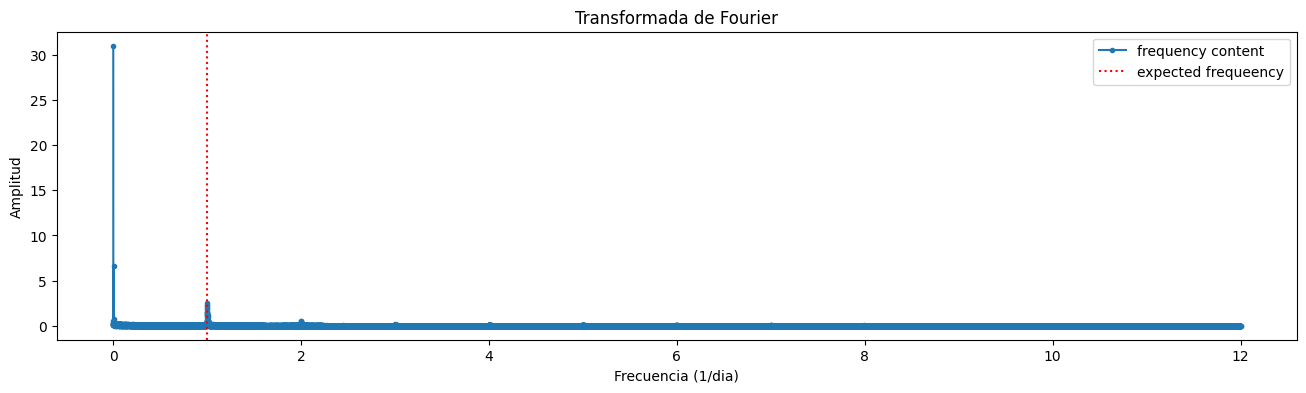

In [91]:
fig = plt.figure(figsize=(16, 4))

plt.plot(freqs_fft_day, temperature_fft_scaled, marker='.', label='frequency content')
plt.axvline(frequency*24, color='red', linestyle=':', label='expected frequeency' )

plt.xlabel('Frecuencia (1/dia)')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier')
plt.legend()
plt.show()


In [93]:
# buscamos los peaks con una altura de menos dee un grado Celsius
peaks, _ = find_peaks(temperature_fft_scaled, height=1)

for p in [0] + list(peaks):
      print("Amplitude at frequency of " + str(freqs_fft_day[p]) + " per day is " + str(temperature_fft_scaled[p]) + " degrees Celsius.")

Amplitude at frequency of 0.0 per day is 31.008936082662768 degrees Celsius.
Amplitude at frequency of 0.00274323335771763 per day is 6.663308601431394 degrees Celsius.
Amplitude at frequency of 0.9990855888807608 per day is 1.471654689564274 degrees Celsius.
Amplitude at frequency of 0.9999085588880761 per day is 2.4651919149783454 degrees Celsius.
Amplitude at frequency of 1.0010058522311631 per day is 2.325718569565326 degrees Celsius.
Amplitude at frequency of 1.0015544989027068 per day is 2.140538281576772 degrees Celsius.
Amplitude at frequency of 1.0029261155815656 per day is 1.1429612137827783 degrees Celsius.
Amplitude at frequency of 1.003474762253109 per day is 1.2108231128225175 degrees Celsius.
